In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [9]:
df= pd.read_csv('data/data_IA_UP.csv')
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v289,v290,v291,v292,v293,v294,v295,v296,v297,v298
0,1,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


### Descriptivo

In [10]:
num_rows = df.shape[0]
num_variables = df.drop('target', axis=1).shape[1]
class_balance = df['target'].value_counts(normalize=True) * 100
print(f"Número de filas: {num_rows}")
print(f"Número de variables (columnas que no son 'target'): {num_variables}")
print("Balance de clases para 'target' (en porcentaje):")
print(class_balance)

Número de filas: 24213
Número de variables (columnas que no son 'target'): 298
Balance de clases para 'target' (en porcentaje):
target
1    57.613679
0    42.386321
Name: proportion, dtype: float64


In [11]:
df['mean_positive'] = df.drop('target', axis=1).mean(axis=1)
df['mean_positive'].describe()

count    24213.000000
mean         0.091024
std          0.048197
min          0.000000
25%          0.053691
50%          0.083893
75%          0.117450
max          0.352349
Name: mean_positive, dtype: float64

In [12]:
df = df.drop(columns=['mean_positive'])

---------

### Split data

In [13]:
df= pd.read_csv('data/data_IA_UP.csv')
df.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v289,v290,v291,v292,v293,v294,v295,v296,v297,v298
0,1,1,1,1,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,1,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,1,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1


In [14]:
train_df, test_df = train_test_split(
    df, test_size=0.2, random_state=42, stratify=df['target'], shuffle=True
)

print("Train DataFrame")
print(train_df.shape[0])
print("\nTest DataFrame")
print(test_df.shape[0])

Train DataFrame
19370

Test DataFrame
4843


In [15]:
print("Train DataFrame - Balance de clases")
print(train_df['target'].value_counts(normalize=True))
print("\nTrain DataFrame - Balance de clases")
print(test_df['target'].value_counts(normalize=True))

Train DataFrame - Balance de clases
target
1    0.576149
0    0.423851
Name: proportion, dtype: float64

Train DataFrame - Balance de clases
target
1    0.576089
0    0.423911
Name: proportion, dtype: float64


In [20]:
train_df.to_csv('data/data_train.csv', index=False)
test_df.to_csv('data/data_test.csv', index=False)

--------------

### Regresión logística

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [18]:
pipeline = Pipeline([
    ('clf', LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=100))
])
## este pipeline solo tiene el la gresión logistica baseline, la idea es que si hay alguna otra transformación que se quiera hacer, 
# se puede agregar al pipeline

In [21]:
df_train = pd.read_csv('data/data_train.csv')
df_train.head()

,target,v1,v2,v3,v4,v5,v6,v7,v8,v9,...,v289,v290,v291,v292,v293,v294,v295,v296,v297,v298
0,1,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,1,0,1,1,1,...,0,0,0,0,0,1,0,0,0,0
4,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X_train = df_train.drop('target', axis=1)   
y_train = df_train['target']

#### Model train

In [23]:
scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='roc_auc')
print(f"Cross val - AUC avg: {scores.mean()}")

Cross val - AUC avg: 0.6536837397788343


In [24]:
scores_df = pd.DataFrame(scores, columns=['AUC Score'])
scores_df['Fold'] = range(1, len(scores) + 1)
mean_score = scores.mean()
std_score = scores.std()
scores_df['Mean'] = mean_score
scores_df['Std'] = std_score
scores_df

,AUC Score,Fold,Mean,Std
0,0.656652,1,0.653684,0.004202
1,0.658635,2,0.653684,0.004202
2,0.647774,3,0.653684,0.004202
3,0.649676,4,0.653684,0.004202
4,0.655682,5,0.653684,0.004202


In [29]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('clf', LogisticRegression(C=1, solver='liblinear'))])

#### Model evaluation

In [43]:
from utils import *


In [31]:
df_test = pd.read_csv('data/data_test.csv')
X_test = df_test.drop('target', axis=1)   
y_test = df_test['target']

In [33]:
df_test['pred_proba-LRG'] = pipeline.predict_proba(X_test)[:, 1]
df_test['pred-LRG'] = pipeline.predict(X_test)

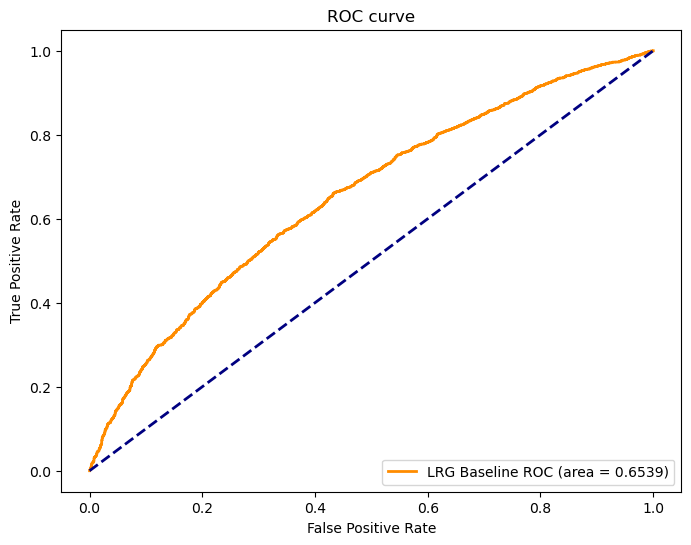

In [35]:
plot_roc_curve(df_test['pred_proba-LRG'], df_test['target'],  "LRG Baseline")

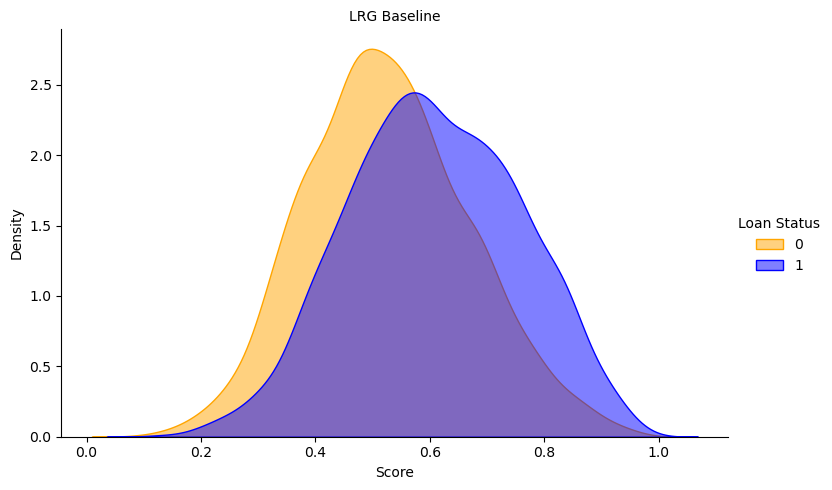

In [44]:
plot_density(df_test['pred_proba-LRG'], df_test['target'],  "LRG Baseline")

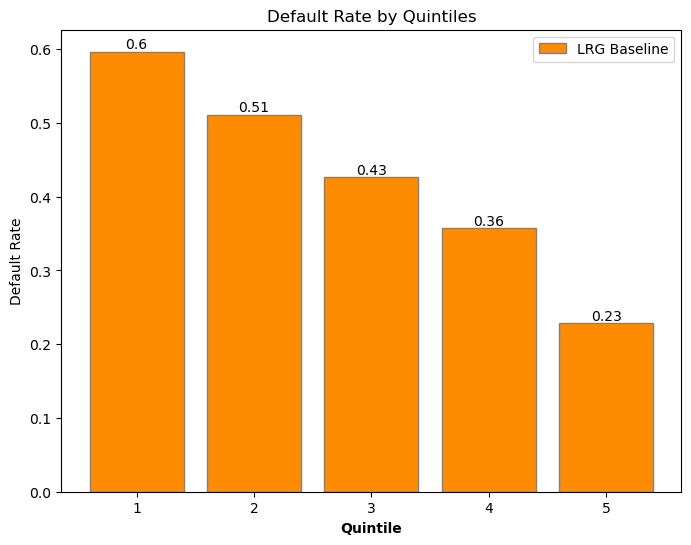

In [40]:
default_rate_by_quintile(df_test['pred_proba-LRG'], df_test['target'],  "LRG Baseline")

In [45]:
metrics_df = calculate_metrics(df_test['pred_proba-LRG'],df_test['pred-LRG'],df_test['target'])
metrics_df

,Metric,Score
0,Average Precision Score,0.709463
1,Recall,0.752330
2,F1 Score,0.698038
3,AUC,0.653900
4,Brier Score,0.227707


------------